In [1]:
# dask
import dask
from dask.distributed import Client
from dask.distributed import deploy
from dask_jobqueue import PBSCluster
import dask

# Local modules
from data_loading import multiframe_tiff
from data_masking import mask_creation
from quality_control.intensity_distribution import get_distributed_counts
from quality_control.intensity_distribution import plot_before_after_distribution
from data_masking.mask_creation import create_masks_on_bag
from utils import util

# standard lib
from pathlib import Path
import matplotlib.pyplot as plt
import io

# image processing
from PIL import Image

# numerical libraries
import numpy

## Local cluster ##

In [2]:
cluster = deploy.local.LocalCluster(n_workers=2)

In [3]:
client = Client(cluster)

In [3]:
import os
os.getcwd()

'/home/sanderth/dask-pipeline/notebooks'

## PBS cluster ##

In [2]:
clusterContext = util.ClientClusterContext(local=False)

In [3]:
clusterContext = clusterContext.__enter__()

In [4]:
path = "/home/sanderth/images"
images_bag = multiframe_tiff.bag_from_directory(path, partition_size=50)

In [5]:
# %%time
# images_bag.compute()

In [6]:
images_masks_bag = create_masks_on_bag(images_bag)

In [ ]:
images_masks_bag.compute()

### Quality Control ###

In [7]:
%% time
intensity_count, masked_intensity_count, bins, masked_bins = get_distributed_counts(images_masks_bag)

/home/sanderth/dask-pipeline/src/quality_control/intensity_distribution.py:114: RuntimeWarning: invalid value encountered in true_divide
  counts_after = (counts_after.T/(counts_after.sum(axis=1))).T


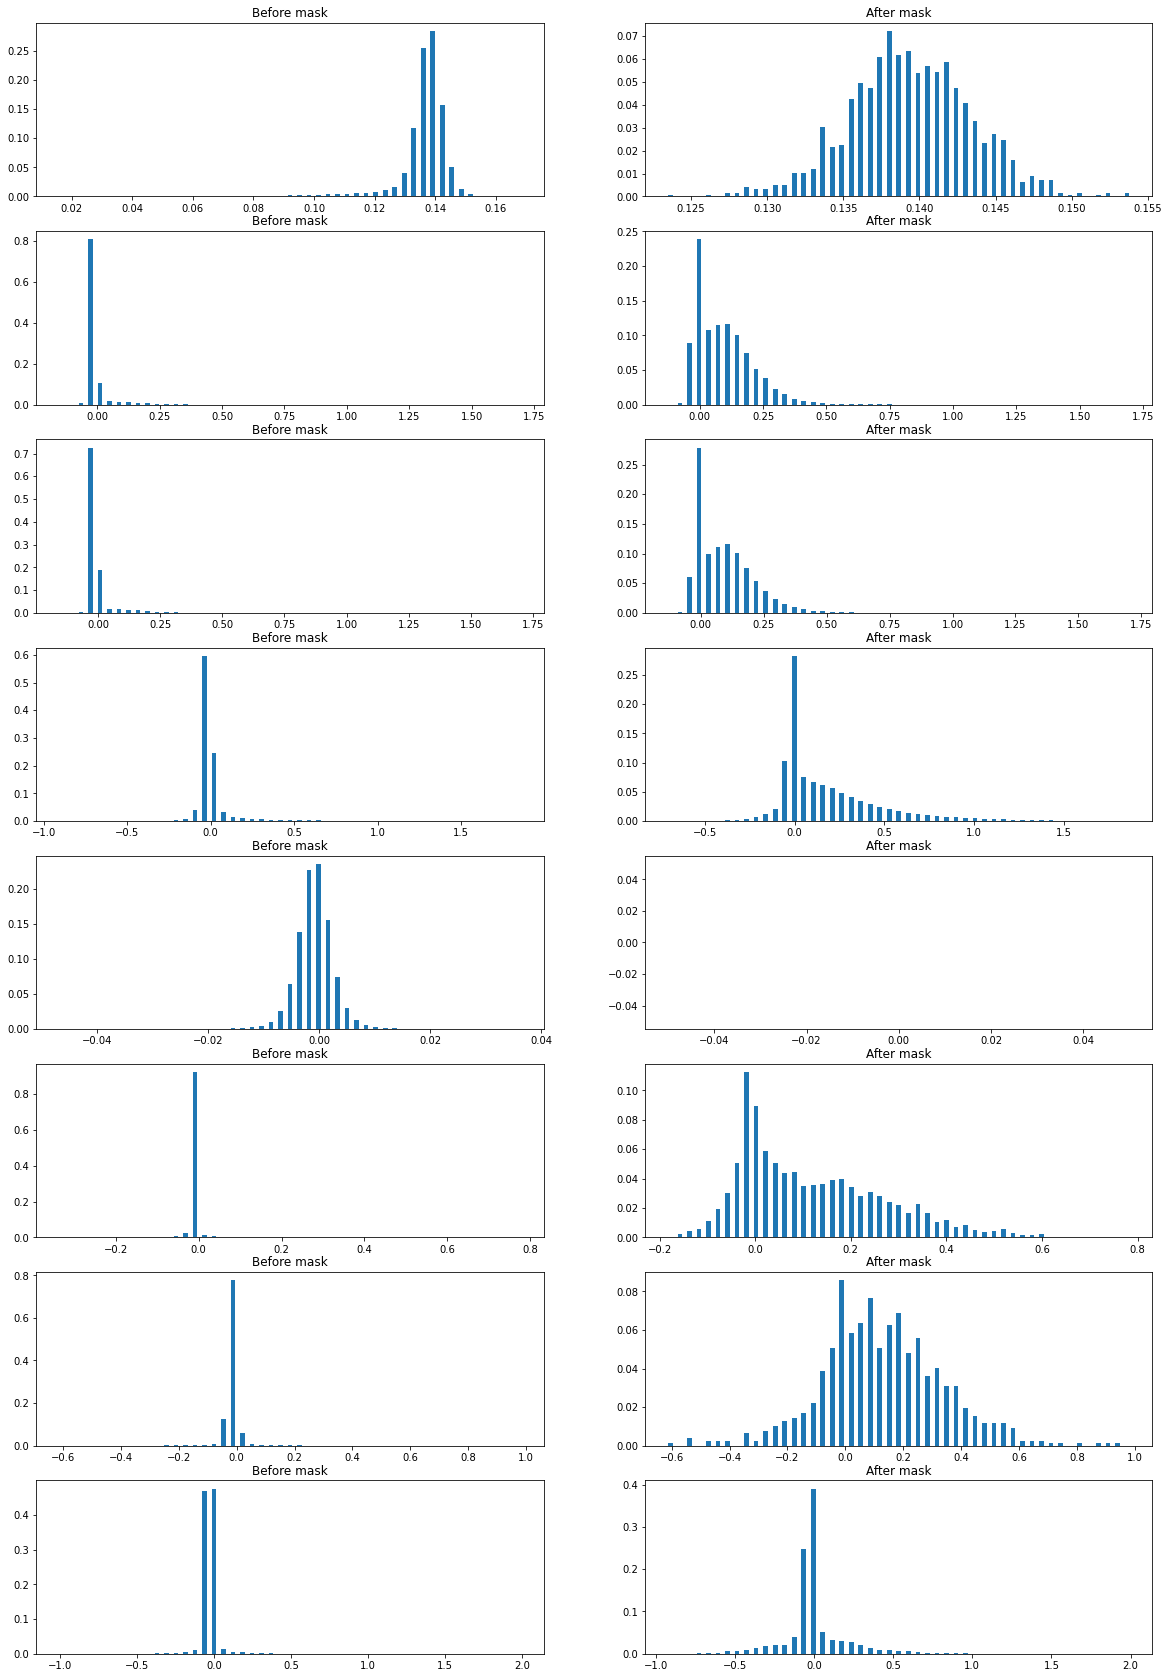

In [8]:
f = plot_before_after_distribution(intensity_count, bins, masked_intensity_count, masked_bins)

In [ ]:
client.close()
cluster.close()